In [98]:
import pandas as pd
from matplotlib import pyplot as plt

In [84]:
def get_speeches():
    speeches = pd.read_json("https://millercenter.org/sites/default/files/corpus/presidential-speeches.json")
    speeches['title'] = speeches['title'].apply(lambda x: x.split(': ')[1])
    speeches = speeches.sort_values('date').reset_index(drop=True)
    
    speeches_long = pd.DataFrame(columns=['title', 'date', 'president', 'text_num', 'text'])

    for i in speeches.index:
        speech_texts = speeches.loc[i, 'transcript'].replace('\r', '').replace('\n\n', '\n').split('\n')

        speech_long = pd.DataFrame({
            'title': speeches.loc[i, 'title'],
            'date': speeches.loc[i, 'date'],
            'president': speeches.loc[i, 'president'],
            'text_num': range(len(speech_texts)),
            'text': speech_texts
        })
        speeches_long = pd.concat([speeches_long, speech_long], ignore_index=True)

    speeches_long['president'] = pd.Categorical(speeches_long['president'], categories=speeches_long['president'].unique())
    speeches_long['text_len'] = speeches_long['text'].apply(len)
    return speeches_long

speeches = get_speeches()


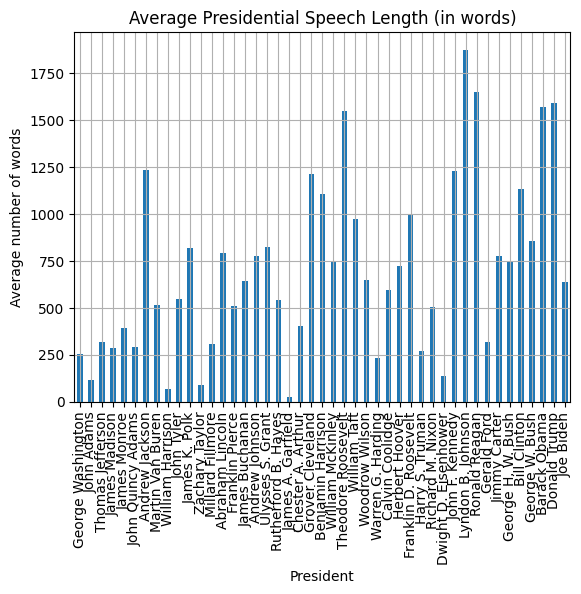

In [81]:
# 1. How many words is the average speech by each president?
(
    speeches
    .groupby(['president', 'title'])['text_len']
    .sum()
    .groupby('president')
    .mean()
    .plot(kind='bar')
)
plt.grid()
plt.xlabel("President")
plt.ylabel("Average number of words")
plt.title("Average Presidential Speech Length (in words)")
plt.show()

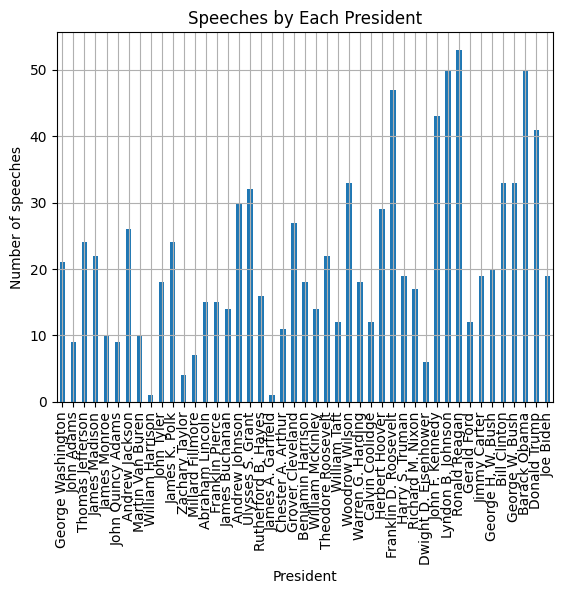

In [77]:
# 2. How many speeches does each president give?
(
    speeches
    .groupby(['president'])['title']
    .nunique()
    .plot(kind='bar')
)
plt.grid()
plt.xlabel("President")
plt.ylabel("Number of speeches")
plt.title("Speeches by Each President")
plt.show()

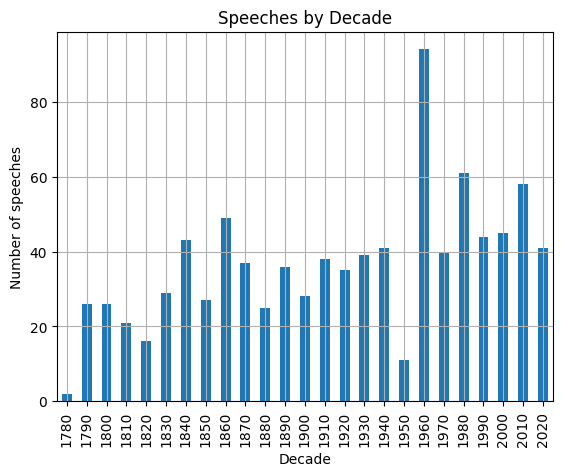

In [108]:
# 3. The number of speeches per year
# groupby needs to be done on the years, not the dates
# we actually want decades
(
    speeches
    .assign(decade=lambda x: x['date'].dt.year // 10 * 10)
    .groupby('decade')['title']
    .nunique()
    .plot(kind='bar')
)
plt.grid()
plt.xlabel("Decade")
plt.ylabel("Number of speeches")
plt.title("Speeches by Decade")
plt.show()